In [1]:
import numpy as np #importing numpy and assigning the variable np to it
import matplotlib #importing matplotlib
import matplotlib.pyplot as plt #importing pyplot from matplotlib and assigning the variable plt to it

In [2]:
fig = plt.figure() #creating an empty figure
x=[] #creating an empty list to store the x values
y = [] #creating an empty list to store the y values
count=0 #setting count to zero (0)

<Figure size 432x288 with 0 Axes>

In [3]:
#opening the text file and extracting the 5th column
with open('imudata.txt') as f: 
    for line in f:
        newword=(line.split(' '))[4] #splitting at the occurence of space
        y.append(int(newword)) #adding to list y
        x.append(count) #adding to list x
        count= count + 1 #incrementing count

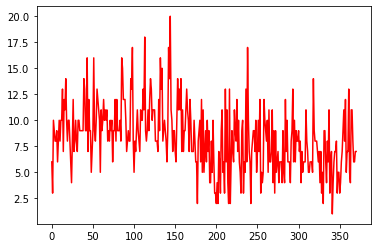

In [4]:
plt.plot(x,y,'red') #initial plotting x vs y, with red as the chosen colour
plt.show()

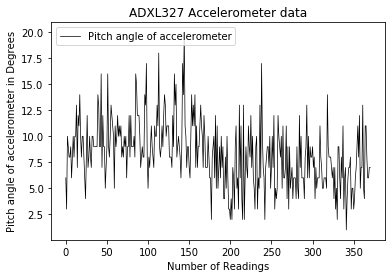

In [5]:
plt.plot(x,y,color='k',linewidth=0.7,label='Pitch angle of accelerometer') #plotting
plt.title('ADXL327 Accelerometer data') #assigning plot title
plt.xlabel('Number of Readings') #assigning x label
plt.ylabel('Pitch angle of accelerometer in Degrees') #assigning y label
plt.legend(loc="upper left")#assigning legend and position of the legend
plt.show() #showing the plot

In [6]:
print('Doing calculations for moving average for 5 samples')
moving_weights=[2,4,9,16,64,128] #various moving weights
# all_count_lists=[] 
# all_moving_avg_y=[]

Doing calculations for moving average for 5 samples


In [7]:
def calc_moving_avg (y,g): #y is the data set  |  g is the weights
    l=len(y) #length of the list containing the data
    
    for x in g: # for every moving average sample
        
        count=[] #empty list for plotting
        count_num=0 #number to be appended to the list count above
        
        print('for samples with a size of : ', x)
        all_mean=[] #a list of all the means
        start=0 #initializing
        
        while start<=l-x: #assigning the limit of the while group
            new_list = y[start:start+x] 
            sum=0
            for i in new_list:
                sum=sum+i
            mean=float(sum/x) #calculating the mean
            all_mean.append(mean) #adding to the all means list
            
            count.append((count_num+x)) #x added to account for the number of initial terms
            #to pass for calculating the moving average. For example, for moving avg of 128 terms
            #the first 127 terms have no moving average and their moving average is calculated together with the
            #128th term
            
            count_num+=1 #incrementing the count by 1
            
            start+=1 #incrementing the start
#         print(all_mean) #to print all the mean values
        print('This has',len(all_mean),' elements only')
        sum_all_mean=0 #new variable
        
        for d in all_mean: #adding all means
            sum_all_mean=sum_all_mean+d
        new_mean=float(sum_all_mean/len(all_mean)) #float value of the new mean, to calculate Standard Deviation
        print("The mean is : ",new_mean) 
        
        numerator=0 #for the calculation of standard deviation
        for i in all_mean: 
            numerator=numerator+((i-new_mean)**2)
        standard_deviation = (numerator/(len(all_mean)-1))**0.5 #completion of standard deviation calculation
        print("The standard deviation is : ",standard_deviation) 
        print('The plot is : >>>> ')
        plt.figure() #new figure
        plt.title('Moving average vs number of elements')
        plt.plot(y,'r') #plotting the variable y
        plt.ylabel('Averaged Data') #adding y axes title
        plt.xlabel('Number of readings') #adding x axes title
        plt.plot(count,all_mean,'k') #plotting the variable all_mean versus count for moving avg representation
        plt.text(250,20,"Mean: ") #adding text
        plt.text(250,18,new_mean) #adding text
        plt.text(250,16,"Standard Deviation :") #adding text
        plt.text(250,14,standard_deviation)  #adding text
        plt.show()#showing the graph

for samples with a size of :  2
This has 370  elements only
The mean is :  8.336486486486486
The standard deviation is :  2.506283395080545
The plot is : >>>> 


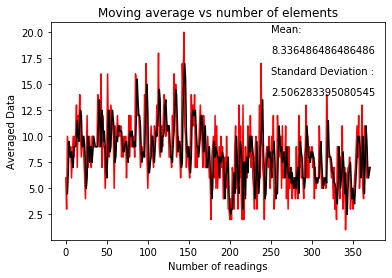

for samples with a size of :  4
This has 368  elements only
The mean is :  8.34850543478261
The standard deviation is :  2.125485472988041
The plot is : >>>> 


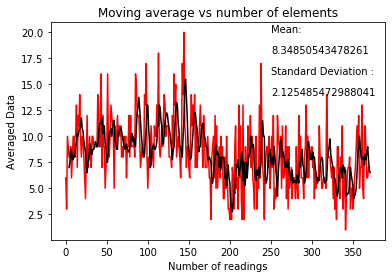

for samples with a size of :  9
This has 363  elements only
The mean is :  8.357208448117534
The standard deviation is :  1.759199655463223
The plot is : >>>> 


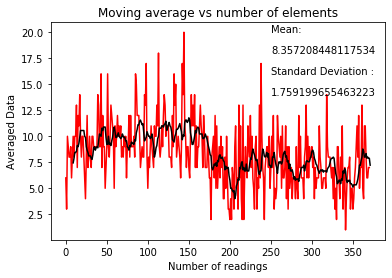

for samples with a size of :  16
This has 356  elements only
The mean is :  8.361130617977528
The standard deviation is :  1.655022861572463
The plot is : >>>> 


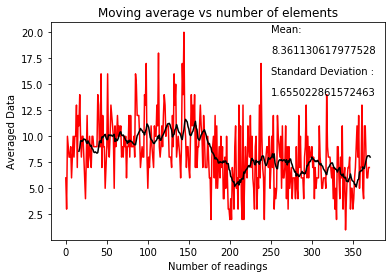

for samples with a size of :  64
This has 308  elements only
The mean is :  8.418526785714286
The standard deviation is :  1.4371873601010623
The plot is : >>>> 


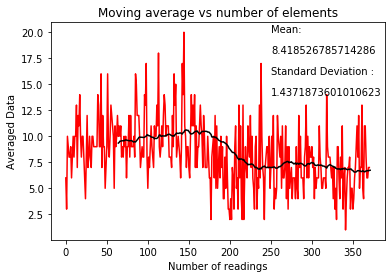

for samples with a size of :  128
This has 244  elements only
The mean is :  8.437115778688524
The standard deviation is :  1.207735712411223
The plot is : >>>> 


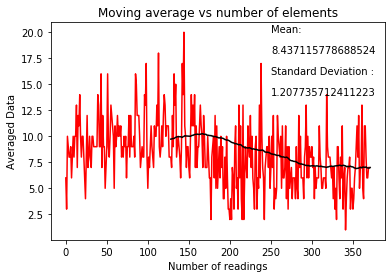

In [8]:
calc_moving_avg(y,moving_weights)

In [9]:
#the end